### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [2]:
x = pd.read_csv("https://apmonitor.com/che263/uploads/Main/heart_rate.txt")
x.head(10)

,Time (sec),Heart Rate (BPM)
0,0.0,103
1,5.0,103
2,10.0,103
3,15.0,105
4,20.0,108
5,25.0,110
6,30.0,110
7,35.0,112
8,40.0,112
9,45.0,114


In [3]:
x.describe()

,Time (sec),Heart Rate (BPM)
count,241.000000,241.000000
mean,600.000000,142.983402
std,348.574478,11.387115
min,0.000000,103.000000
25%,300.000000,138.000000
50%,600.000000,147.000000
75%,900.000000,151.000000
max,1200.000000,154.000000


### Plotting Data 

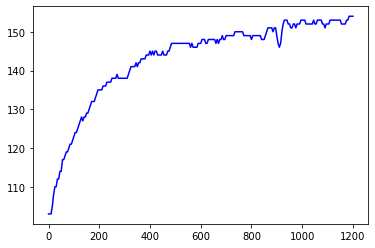

In [4]:
t=x['Time (sec)']
bp=x['Heart Rate (BPM)']
plt.plot(t, bp , color='blue')

Through the curve we found that the data is Non-Linear

### Creating Functoion

BPM = $c_{0} + c_{1}t - c_{2}e^{-c_{3}t}$


In [5]:
def bpm(t, c0, c1, c2, c3):
    return c0+c1*t-c2*np.exp(-c3*t)

### Fitting Data in Curve

Range of Guess value : <br>
$c_0$ and $c_2$ = $50$ to $200$ <br>
$c_1$ and $c_3$ are closer to $0.01$

In [6]:
from scipy.optimize import curve_fit
guess = [100,0.01,100,0.01]
val, cov = curve_fit(bpm,t,bp,guess)
val

array([1.42373197e+02, 9.24806136e-03, 4.00292041e+01, 6.84029132e-03])

### Using function to get values 

In [7]:
y_fit = bpm(t,1.42373197e+02, 9.24806136e-03, 4.00292041e+01, 6.84029132e-03)

### Plotting the Predicted Regression Line

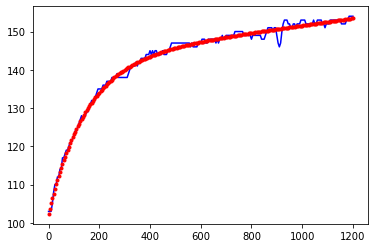

In [8]:
plt.plot(t, bp , color='blue')
plt.plot(t, y_fit , 'r.')

### Accuracy

In [9]:
from sklearn.metrics import r2_score
print("r2 =", r2_score(y_fit,bp))

r2 = 0.9929887696714687
